In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
Categories=['AjwaBagus','AjwaTidakBagus','SukariBagus', 'SukariTidakBagus']
print("Type y to give categories or type n to go with classification of AjwaBagus, AjwaTidakBagus, SukariBagus and SukariTidakBagus");

while(True):
  check=input()
  if(check=='n' or check=='y'):
    break
  print("Please give a valid input (y/n)")
if(check=='y'):
  print("Enter How Many types of Images do you want to classify")
  n=int(input())
  Categories=[]
  print(f'please enter {n} names')
  for i in range(n):
    name=input()
    Categories.append(name)
  print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of AjwaBagus, AjwaTidakBagus, SukariBagus and SukariTidakBagus
y
Enter How Many types of Images do you want to classify
4
please enter 4 names
AjwaBagus
AjwaTidakBagus
SukariBagus
SukariTidakBagus
If not drive Please upload all the 4 category images in google collab with the same names as given in categories


In [3]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir="dataset"
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : AjwaBagus
loaded category:AjwaBagus successfully
loading... category : AjwaTidakBagus
loaded category:AjwaTidakBagus successfully
loading... category : SukariBagus
loaded category:SukariBagus successfully
loading... category : SukariTidakBagus
loaded category:SukariTidakBagus successfully


0         1         2         3         4         5         6  \
0    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
1    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
2    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
3    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
4    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
..        ...       ...       ...       ...       ...       ...       ...   
155  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
156  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
157  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
158  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   
159  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196  0.545098   

            7         8         9  ...     67491     67492     67493  \
0    0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
1    0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
2    0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
3    0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
4    0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
..        ...       ...       ...  ...       ...       ...       ...   
155  0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
156  0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
157  0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
158  0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   
159  0.760784  0.290196  0.545098  ...  0.545098  0.760784  0.290196   

        67494     67495     67496     67497     67498     67499  Target  
0    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       0  
1    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       0  
2    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       0  
3    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       0  
4    0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       0  
..        ...       ...       ...       ...       ...       ...     ...  
155  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       3  
156  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       3  
157  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       3  
158  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       3  
159  0.545098  0.760784  0.290196  0.545098  0.760784  0.290196       3  

[160 rows x 67501 columns]

In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [5]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [6]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 3, 3, 1, 3, 0, 2, 2, 3, 0, 2, 1, 0, 0, 3, 3, 3, 3, 1, 2, 0, 1,
       3, 1, 3, 3, 0, 2, 2, 0, 1, 3])

In [7]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 2, 2, 0, 3, 1, 2, 2, 2, 0, 2, 1, 0, 1, 3, 3, 3, 3, 1, 0, 0, 1,
       2, 0, 3, 3, 1, 0, 2, 0, 1, 3])

In [8]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 65.625% accurate


In [9]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Imagedataset/AjwaBagus/ajwabagus9.jpg


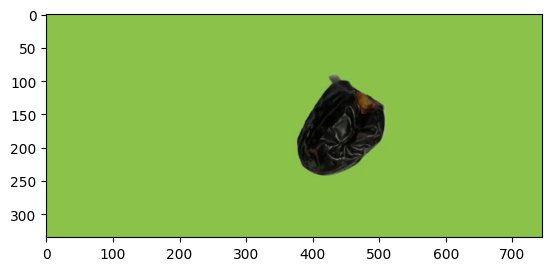

AjwaBagus = 52.49938557535384%
AjwaTidakBagus = 2.9379180368930027%
SukariBagus = 9.985408915271284%
SukariTidakBagus = 34.57728747248186%
The predicted image is : SukariTidakBagus
Is the image a SukariTidakBagus ?(y/n)
n
What is the image?
Enter 0 for AjwaBagus
Enter 1 for AjwaTidakBagus
Enter 2 for SukariBagus
Enter 3 for SukariTidakBagus
0
Please wait for a while for the model to learn from this image :)
The model is now 72.72727272727273% accurate
Thank you for your feedback


In [11]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")